## INTRODUCTION

Using different house-related features, it is required to predict the final price of each home. Firstly, the data will be preprocessed and missing values will be imputed. Then, different regression models, such as Kernel Ridge and Gradient Boosting regressor will be compared using K-fold Cross Validation. The model with the best RMSE score will be submitted

### Upload CSV files

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


### Data Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
import warnings
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import skew
from scipy.special import boxcox1p

def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

pd.set_option('display.max_columns', None)

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

trainID = train['Id'] #used for submissions
testID = test['Id']
train.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

### Data Exploration

Display first 5 columns of the train dataset

In [ ]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Display first 5 columns of the train dataset

In [ ]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


**It is noted that the test set does not contain SalePrice**

In [ ]:
print(f'train shape {train.shape}')
print(f'test shape {test.shape}')

train shape (1460, 80)
test shape (1459, 79)


Print data type of each feature

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Display the range of values for each numeric feature to determine the worst outliers as these affect the models ability to learn a linear relationship between the target and the features

#### Numerical Data

Display statistics about the numeric features

In [ ]:
train.describe(include=[np.number])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The outlier for 'GrLivArea' was quite far out compared to other values. This is seen in the scatter plot below.

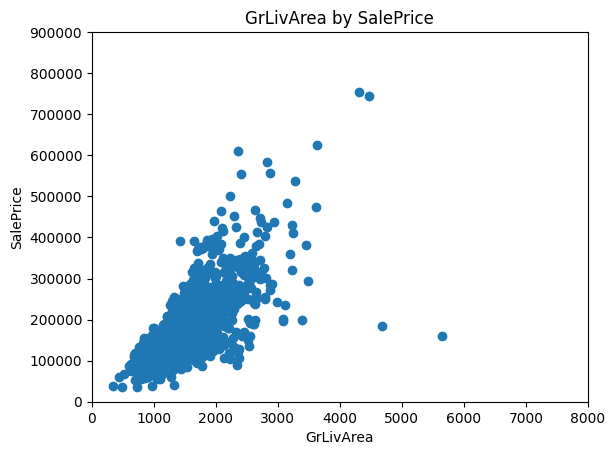

In [ ]:
def plot_scatter(df, feature_1_name, feature_2_name):
    plt.scatter(df[feature_1_name], df[feature_2_name])
    plt.title(f'{feature_1_name} by {feature_2_name}')
    plt.xlabel(feature_1_name)
    plt.ylabel(feature_2_name)
    plt.xlim([0,8000])
    plt.ylim([0,900000])
    plt.show()

plot_scatter(train,'GrLivArea','SalePrice')

The outliers for  'GrLivArea' are removed to improve model preformance. Futhermore, as seen in the 'Data Corelation' section, 'GrLivArea' has a high correlation to the target value, 'SalePrice'. Thus removing the outliers for this significant feature improves the regression ability of the model

In [ ]:
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 2800000)].index)
print(f"train shape : {train.shape}")
train_size = train.shape[0] # used later on to split dataset into train and test sets
test_size = test.shape[0]

train shape : (1456, 80)


**Scatter plot of numeric features against SalePrice**

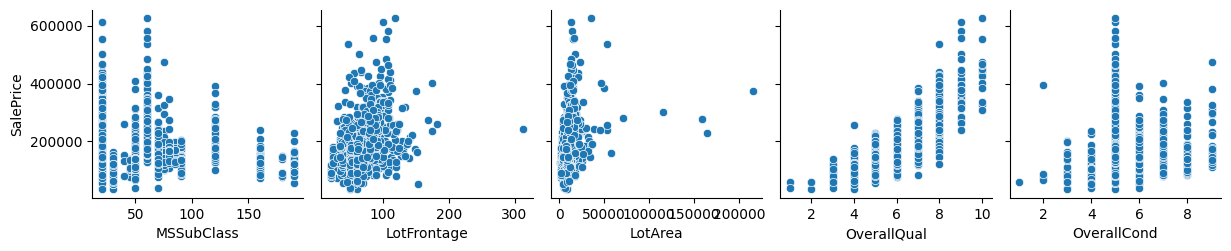

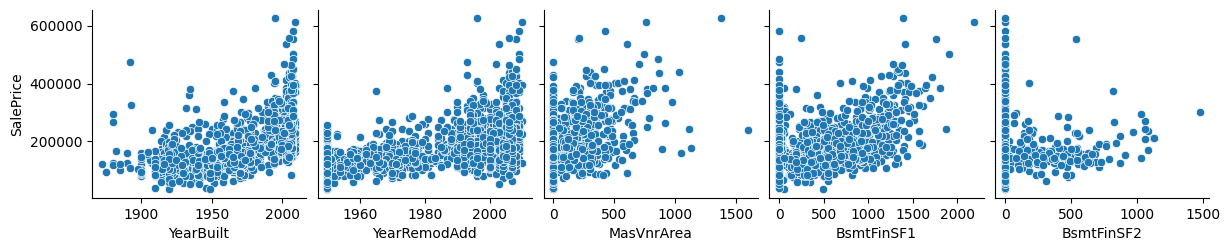

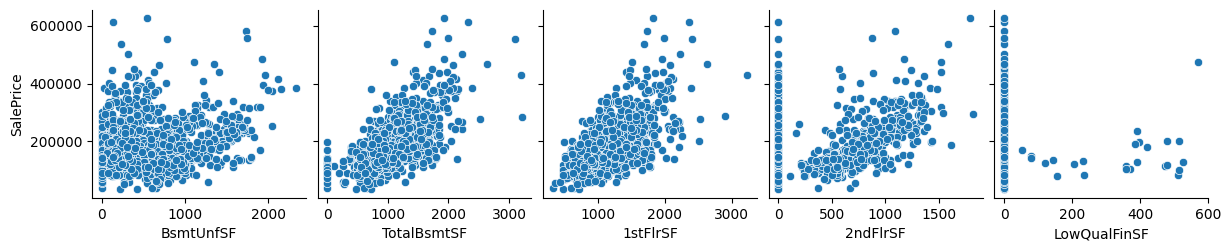

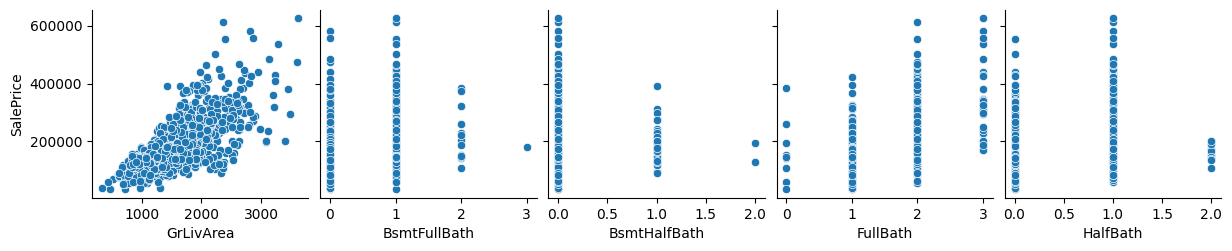

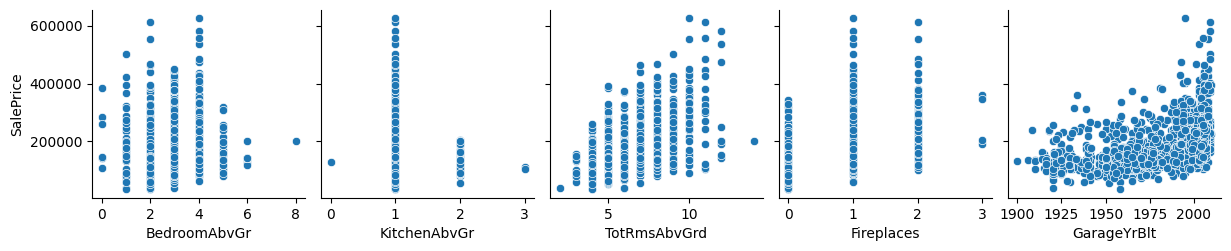

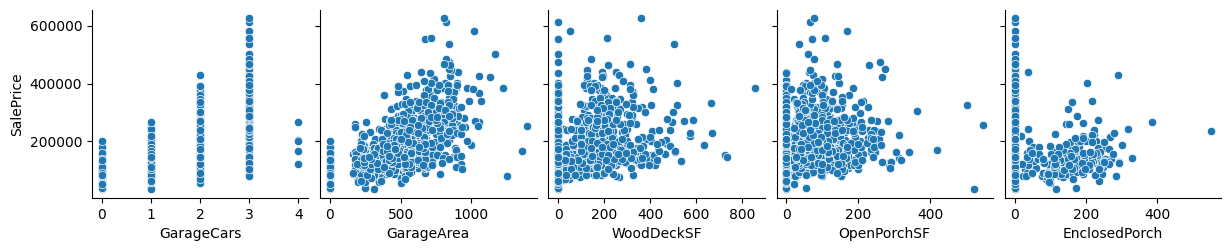

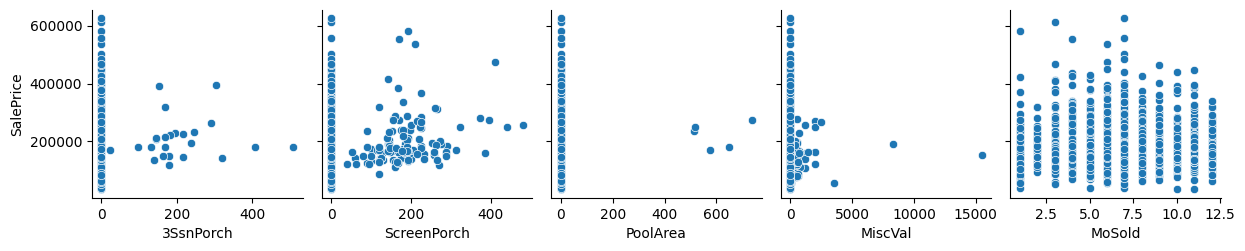

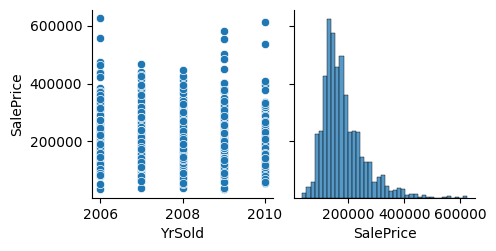

In [ ]:
df_numerical = train.select_dtypes(include=['number'])
for i in range(0, len(df_numerical.columns), 5):
    sns.pairplot(data=df_numerical,
                x_vars=df_numerical.columns[i:i+5],
                y_vars=['SalePrice'])

Many Features such as PoolArea, YrSold, HalfBath, BsmtFullBath and Fireplace had the least correlation with the target and are amongst the least significant features

Plot distributions of each of the numerical features

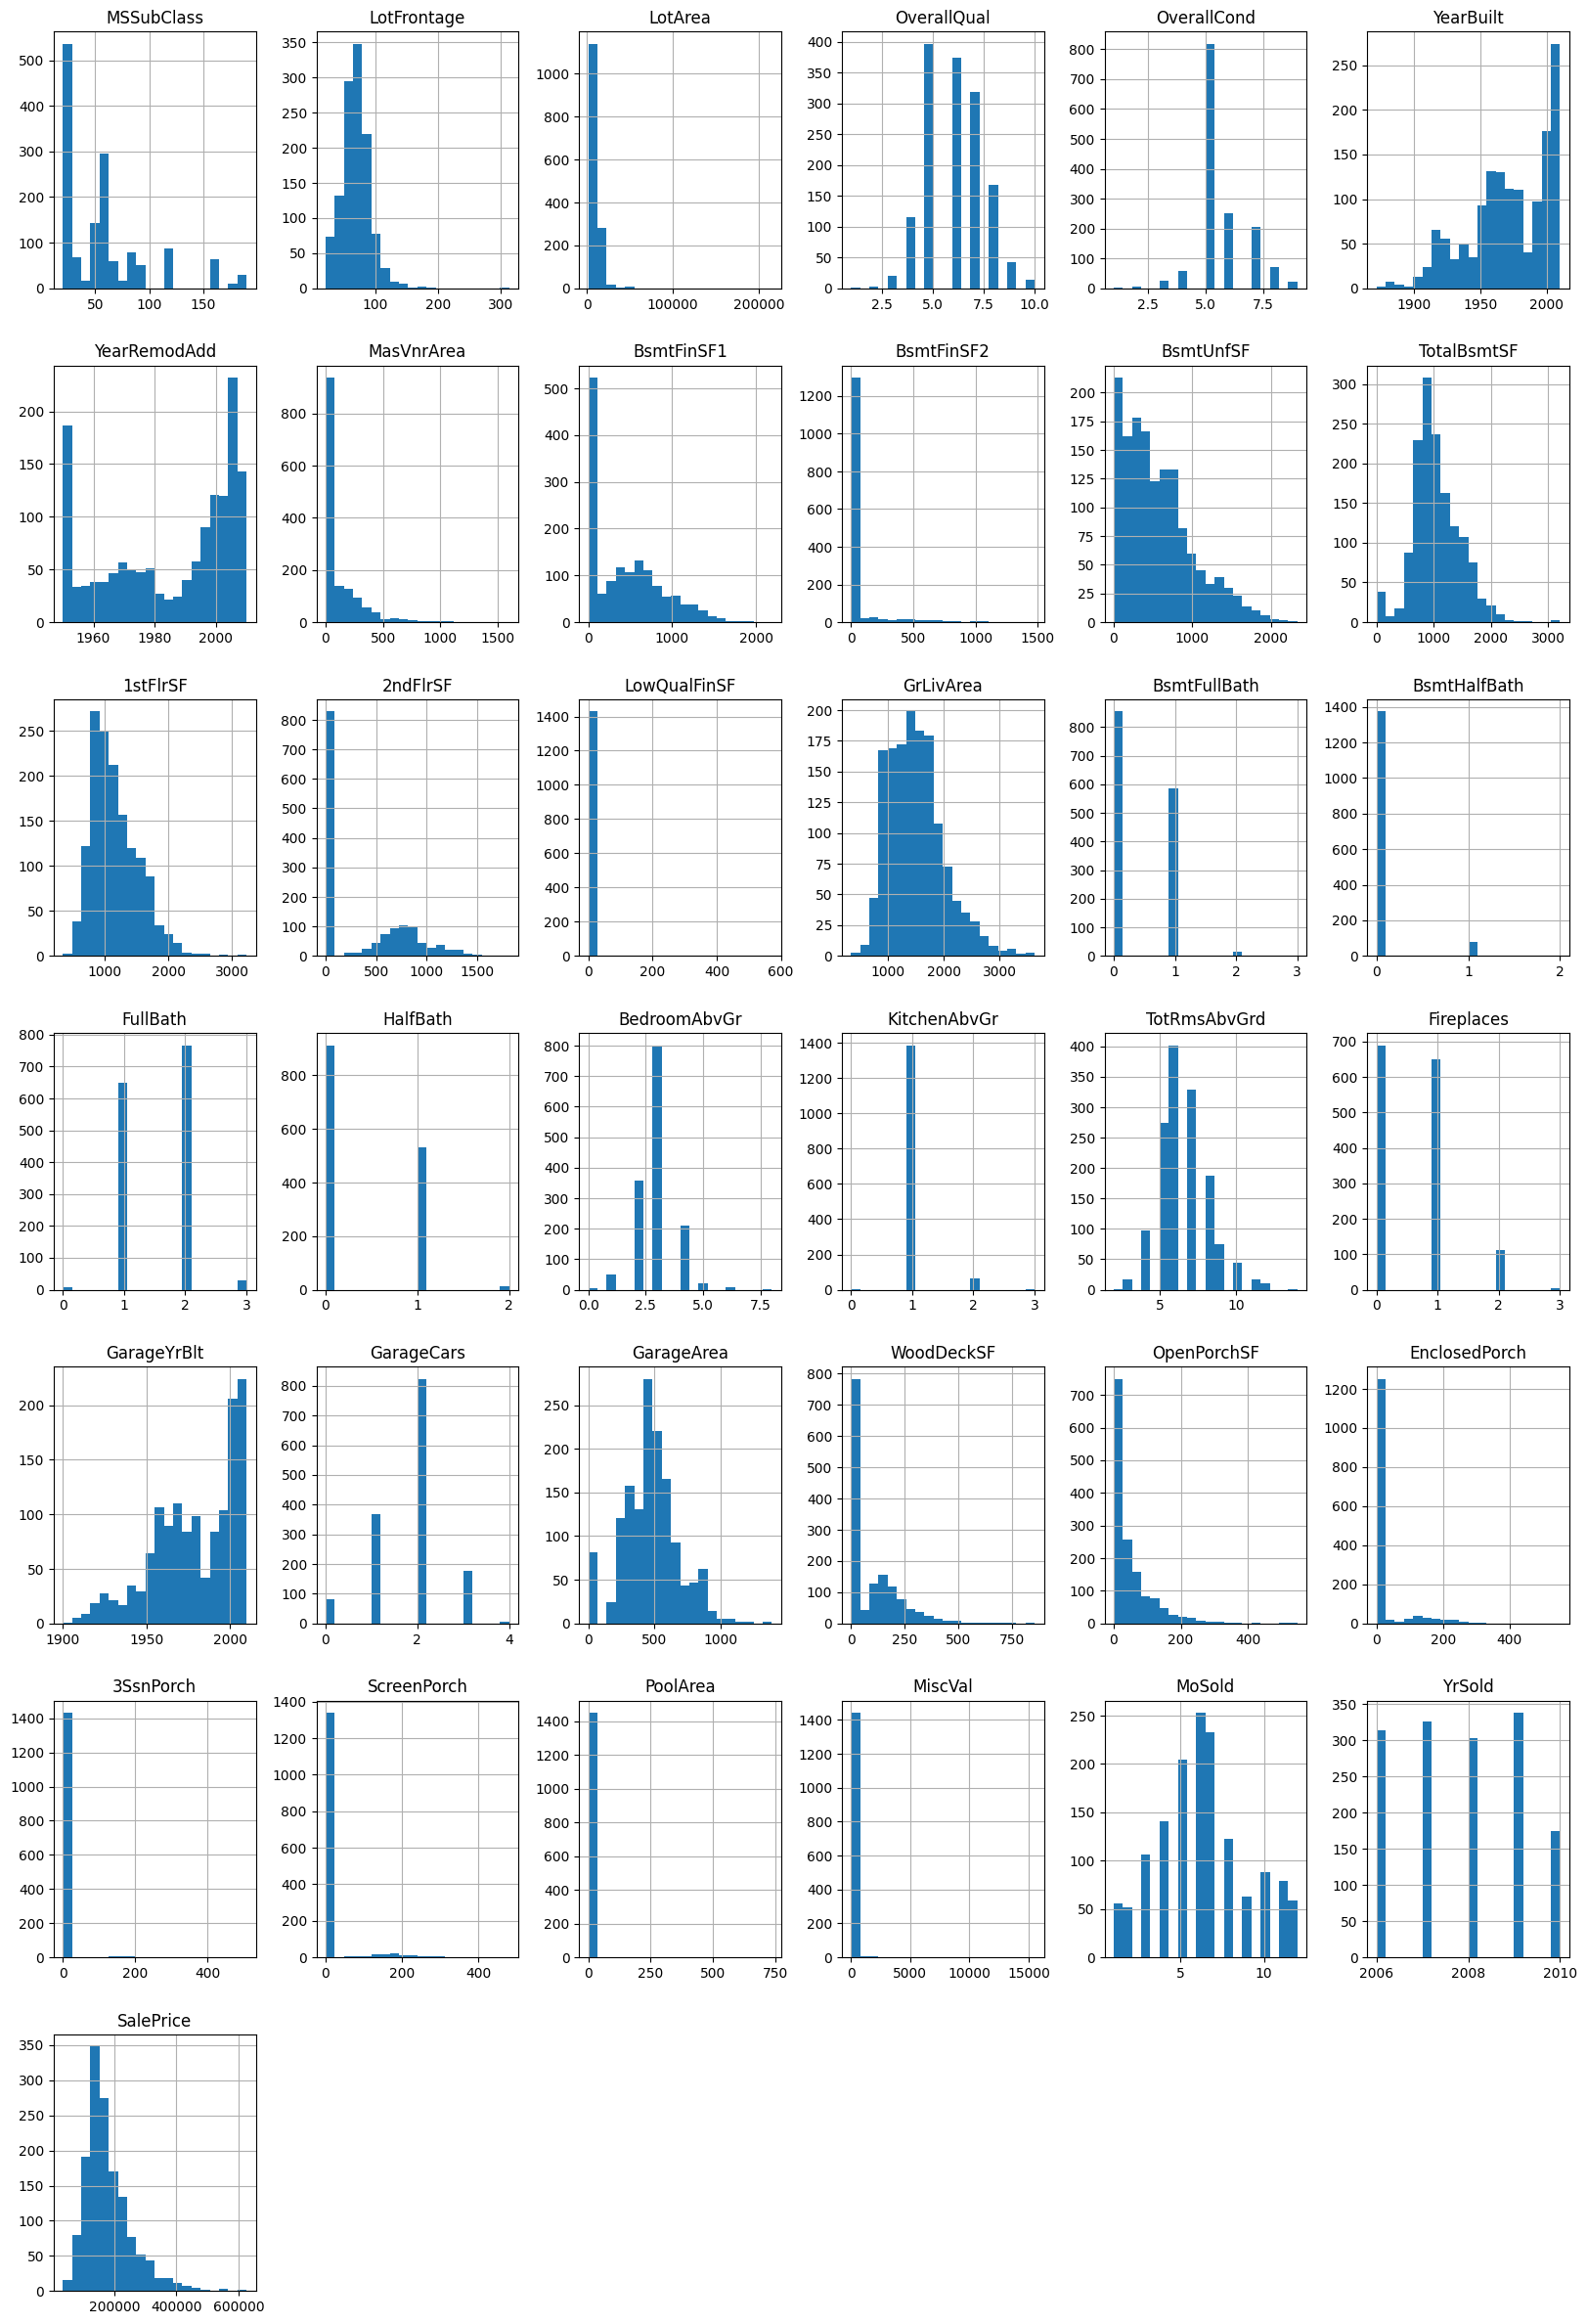

In [ ]:
df_numerical = train.select_dtypes(include=['number']);
df = df_numerical.columns;
train[df].hist(bins=20, figsize=(20, 30));

####Categorical Features

Histrogram of neighborhood was plotted to determine was common neighborhood as well as the distribution

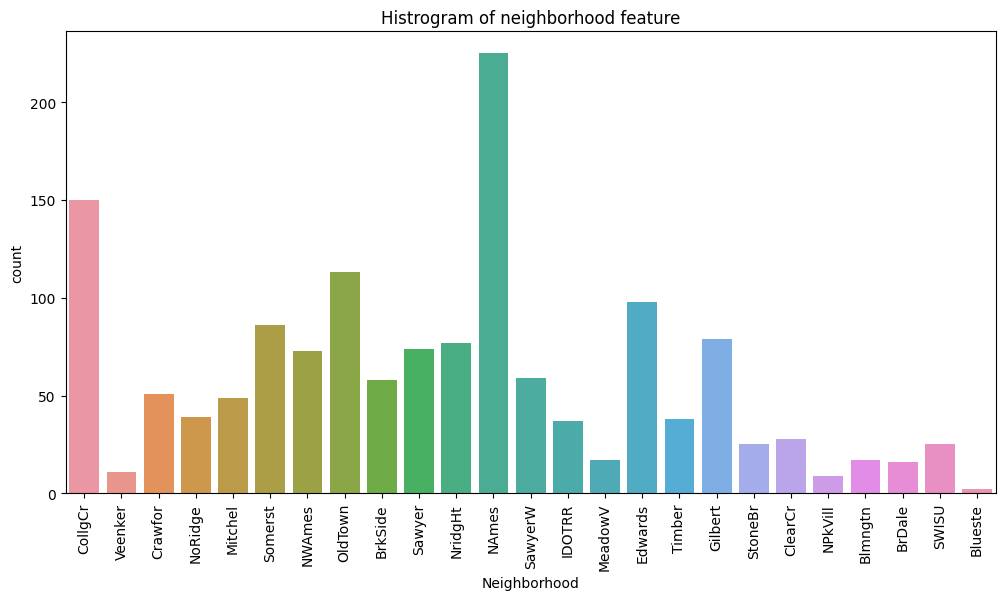

In [ ]:
fig = plt.figure(figsize = (12, 6))
sns.countplot(x = 'Neighborhood', data = train)
plt.title('Histrogram of neighborhood feature')
xt = plt.xticks(rotation=90)

Display the statistics for the categorical features

In [ ]:
train.describe(include=[np.object])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1456,1456,91,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1448,1456,1456,1456,1419,1419,1418,1419,1418,1456,1456,1456,1455,1456,1456,766,1375,1375,1375,1375,1456,5,280,54,1456,1456
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,7,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1147,1450,50,925,1309,1455,1051,1378,225,1258,1442,1216,726,1140,1432,515,504,863,906,1278,643,649,1307,953,430,1252,1424,737,1361,1330,735,1356,378,867,605,1307,1322,1336,2,156,49,1265,1197


### Feature Engineering

#### Data Correlation

Correlation between variables is plotted. OverallQual,GrLivArea, GarageArea and GarageCars are seen to have the highest correlation with the SalePrice

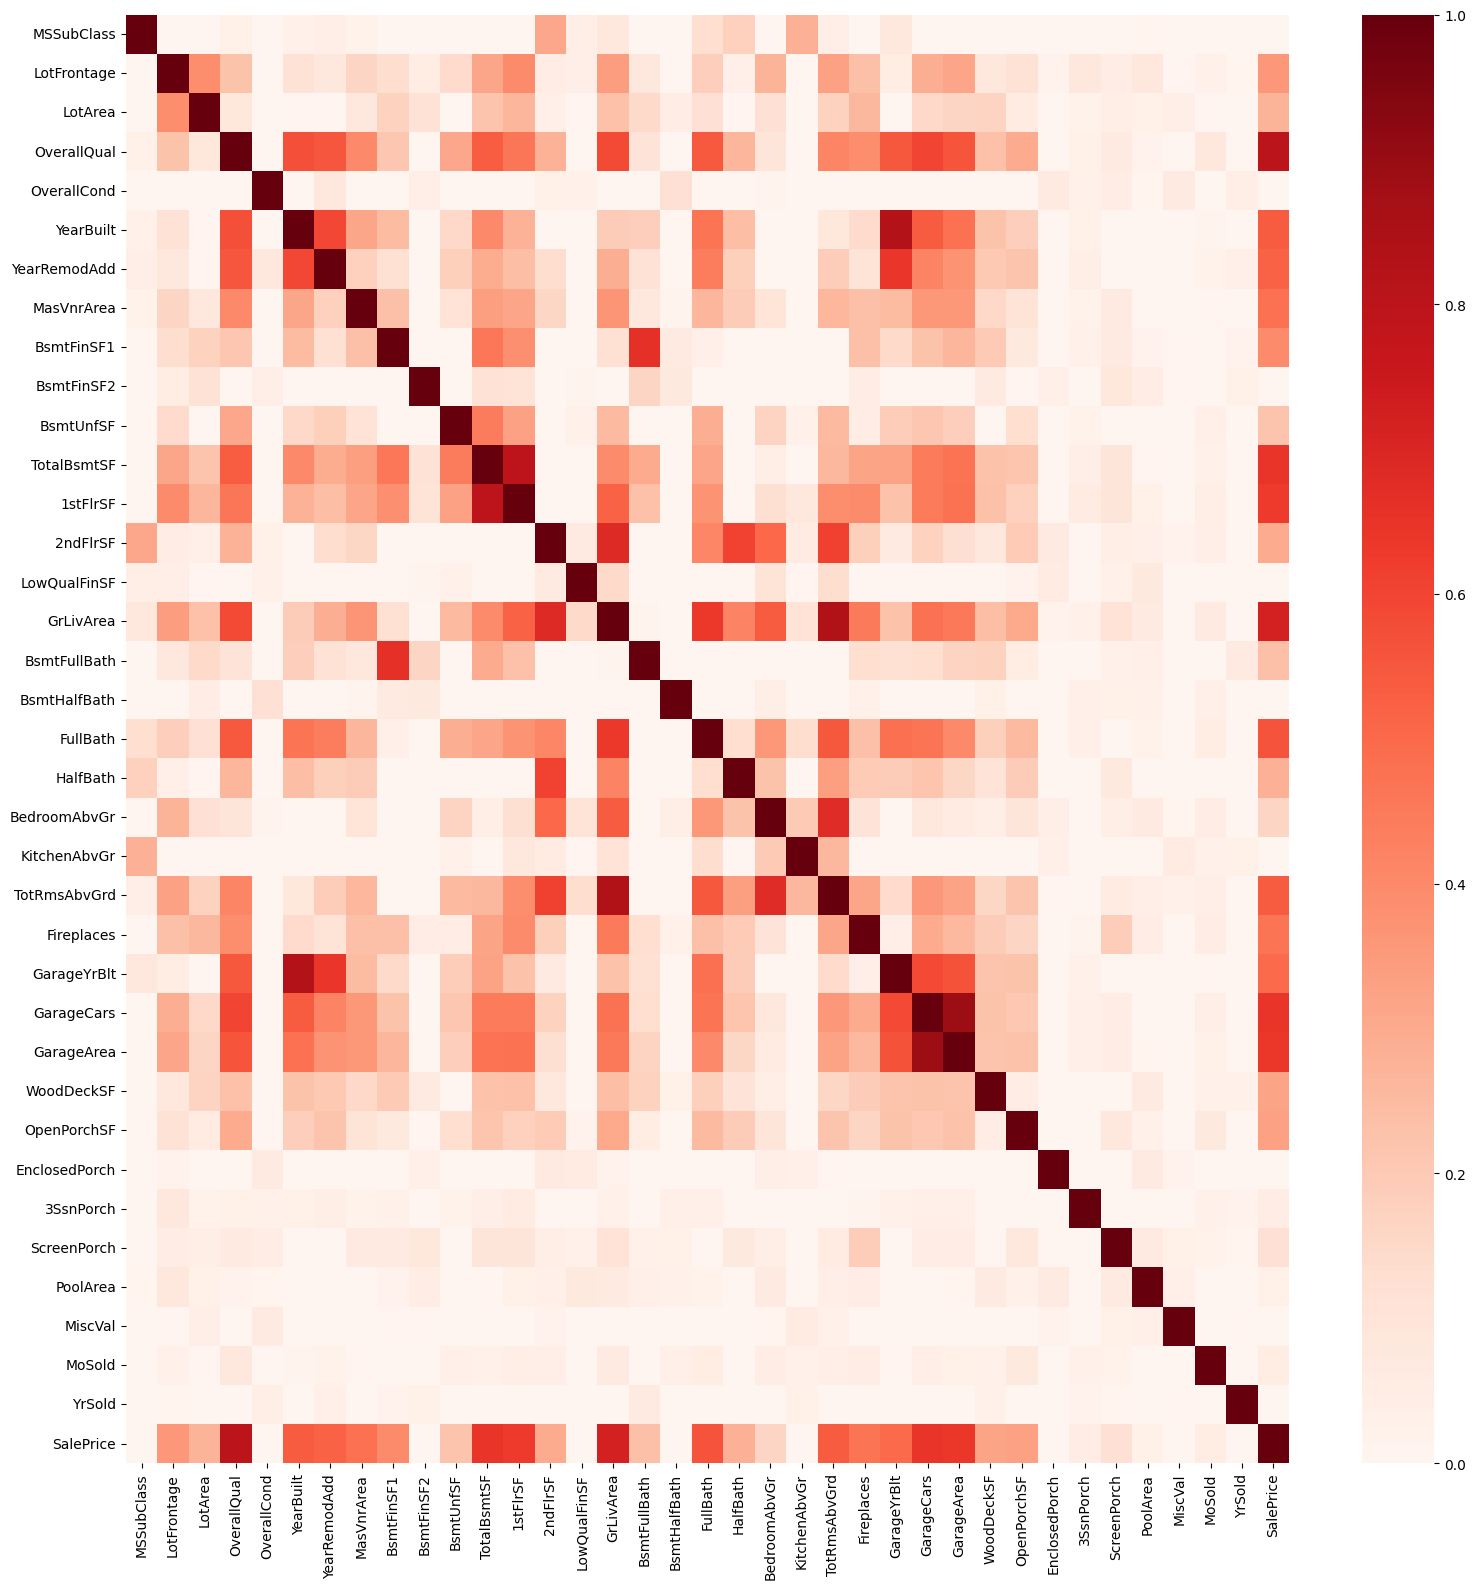

In [ ]:
corrMatrix = (train.corr())
plt.subplots(figsize=(16,16))
sns.heatmap(corrMatrix,cmap=plt.cm.Reds,vmin=0,vmax=1, xticklabels=True, yticklabels=True);
plt.tight_layout()
plt.show()

Combine train and test datasets to perform transformations on one dataframe


In [ ]:
y = train['SalePrice']
dataset = pd.concat([train, test],axis=0)
dataset.drop(['SalePrice'], axis=1, inplace=True)
print(f"y shape : {y.shape}")
print(f"train shape : {train.shape}")

y shape : (1456,)
train shape : (1456, 80)


#### Missing Values

Determine the missing values in the dataset. PoolQC is seen to have the most missing values

In [ ]:
def display_null_columns(df):
  null_counts = df.isna().sum()
  null_value_cols = null_counts[null_counts > 0].sort_values(ascending=False)
  return null_value_cols

display_null_columns(dataset)


PoolQC          2907
MiscFeature     2810
Alley           2717
Fence           2345
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageArea         1
GarageCars         1
Electrical         1
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

Plot of histogram of missing features

Text(0, 0.5, 'Number of missing values')

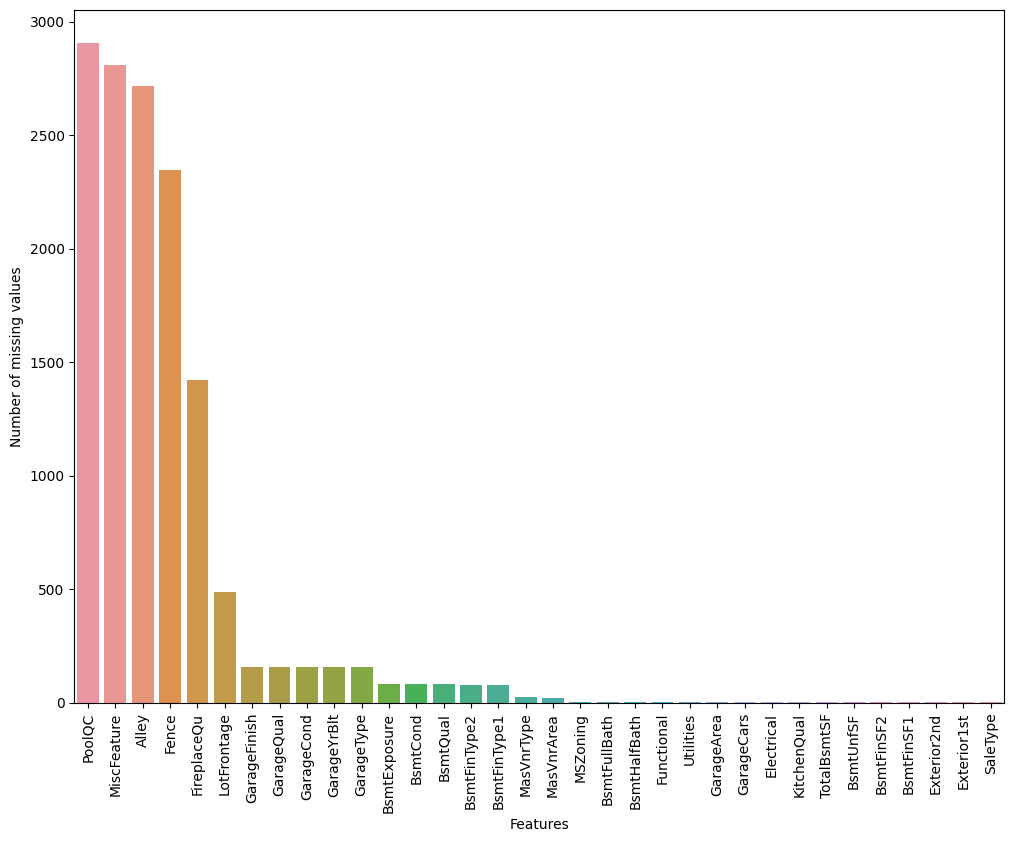

In [ ]:
plt.subplots(figsize=(12,9))
missing = display_null_columns(dataset)
plt.xticks(rotation='vertical')
sns.barplot(x=missing.index,y=missing)
plt.xlabel('Features')
plt.ylabel('Number of missing values')

#### Data Imputation

Combine train and test datasets to perform transformations on one dataframe

In [ ]:
dataset = pd.concat((train,test)).reset_index(drop = True)
print(f'train shape {train.shape}')
print(f'test shape {test.shape}')

dataset.drop(['SalePrice'], axis = 1, inplace = True)
dataset = dataset.drop(['Utilities'], axis = 1)


train shape (1456, 80)
test shape (1459, 79)


Convert numerical features, which have categorical attributes, to categorical features which improved performance since the models were able to better understand the information. ie MoSold is categorical column whereby each month is a class

In [ ]:
dataset['MSSubClass'] = dataset['MSSubClass'].apply(str)
dataset['OverallCond'] = dataset['OverallCond'].apply(str)
dataset['YrSold'] = dataset['YrSold'].apply(str)
dataset['MoSold'] = dataset['MoSold'].apply(str)

* Removing records which contain NaN values will remove much detail from the dataset, which can lead to worsened model performance and bias. Futhermore, the large amount of missing values in this dataset makes this approach unpractical as the dataset will be drastically reduced and much detail will be lossed.

* Thus, data imputation will be performed by individually analysing the 35 features that contain missing values, and providing an approach that least affects the statistical qualities of the dataset

According to the data descriptions, the following features use NA to represent None:
* **PoolQC** : Pool Quality - NA represents no pool. There are many missing values since most houses do not have a pool.
* **MiscFeatures** : Miscellanous features not covered in other categories
* **Alley** : Type of alley access to property. NA represents no alley access
* **FireplaceQC** : Fireplace Quality - NA represents no fireplace
* **Fence** : Fence quality - NA represents no fence
* **GarageType** : Garage location - NA represents no garage
* **GarageFinish** : Interior finish of the garage - NA represents no garage
* **GarageQual** : Garage Quality - NA represents no garage
* **GarageCond** : Garage Condition - NA represents no garage
* **BsmtQual** : Height of the basement - NA represents no basement
* **BsmtCond** : General condition of the basement - NA represents no basement
* **BsmtExposure** : Walkout or garden level basement walls - NA represents no basement
* **BsmtFinType1** : Quality of basement finished area - NA represents no basement
* **BsmtFinType2** : Quality of second finished area (if present) - NA represents no second finished area
* **MasVnrType** : Masonry veneer type - NA represents no masonry veneer

These are categorical features. It can be assumed that the missing values represent the absence of that house 'feature'. This also makes sense since these features have the most missing values. Thus, the missing values for the above fields will be replace with 'NA'

In [ ]:
features_to_fill_na = ['PoolQC', 'MiscFeature', 'Alley', 'FireplaceQu', 'Fence',
                       'GarageType','GarageFinish','MSSubClass',
                       'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond',
                       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType']

dataset[features_to_fill_na] = dataset[features_to_fill_na].fillna('None')


* **LotFrontage** - Linear feet of street connected to property. This varies based on neighborhood, therefore all missing values were replaced by the median LotFrontage based on the neighborhood. All houses are likely to have a front lot. Based on the data, this feature appears to be ordinal, thus the median was used instead of the mean

In [ ]:
neighborhoodMean = dataset.groupby('Neighborhood')['LotFrontage']

def fill(x):
  return x.fillna(x.median())

#transform works on series (columns) in isolation from each other
#transform passes each column for each group individually as a series to the 'fill' function
#applies function to each group of rows that share the same neighborhood
#transform returns sequence of same length as the group
dataset['LotFrontage'] = neighborhoodMean.transform(fill)

However, missing data for garage related fetaures such as **GarageYrBlt,GarageArea and GarageCars** can be attributed to not all houses having a garage. These missing values are replaced with a 0 since these are ordinal features.

In [ ]:
garage_features_to_fill = ['GarageYrBlt', 'GarageArea', 'GarageCars']
dataset[garage_features_to_fill] = dataset[garage_features_to_fill].fillna(0)

The same logic can be applied to basement features, whereby missing values can be attributed to the house not having a basement, thus these values were undocumented. Thus the ordinal basement related features : **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** are replaced with a 0

In [ ]:
basement_features_to_fill = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
dataset[basement_features_to_fill] = dataset[basement_features_to_fill].fillna(0)

The ordinal feature **MasVnrArea** can be replaced with 0 to indicate no Masonry Veneer

In [ ]:
dataset['MasVnrArea'].fillna(0,inplace=True)

Description for **Functional** says to assume typical 'Typ' unless deductions are warranted. Thus these missing values are replaced with 'Typ'

In [ ]:
dataset['Functional'].fillna('Typ',inplace=True)

The remaining missing values constitute the smallest perecentage of missing values in the dataset. These missing values of the categorical features can be replace by the mode value for each feature. These are features that every house has thus, NA would not make sense

In [ ]:
remaining_features = ['SaleType','Exterior1st','Exterior2nd','KitchenQual','Electrical','MSZoning']
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

dataset[remaining_features] = imp_mode.fit_transform(dataset[remaining_features])

Check to see if there are no missing values remaining

In [ ]:
display_null_columns(dataset)

Series([], dtype: int64)

#### Categorical Column Encoding

* Use **label encoding** to convert only the categorical features (which have a sort of hierachy/relationship to each other) to numeric values which can be used to train the model. One hot encoding was not used at it would increase the dimensionlity of the features greatly, since most features have 2-8 possible values. The Neighborhood feature even over 30 possible labels.
* Futhermore, the label encoding better captures the relationships between the classes of the features. Ie encoding all the quality features, with number 0 to n-1 number of classes, allows the classes that are hierarchical, to  be close together. Thus the model will better learn these relationship as apposed to those of one-hot-encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond', 'HeatingQC', 'PoolQC',
       'KitchenQual', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
       'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'MoSold','YrSold')

for c in cols:
    lbl = LabelEncoder()
    dataset[c] = lbl.fit_transform(dataset[c])


In [ ]:
print(f'Encoded data shape {dataset.shape}')

Encoded data shape (2915, 78)


####Creating New Features

In [ ]:
dataset['TotalSF'] = dataset['TotalBsmtSF'] + dataset['2ndFlrSF']
# dataset['YrSold'] = dataset['YrSold'].apply(int)
# dataset['Age'] = dataset['YrSold'] - dataset['YearBuilt']   # worse performance
# dataset['AgeRemod'] = dataset['YrSold'] - dataset['YearRemodAdd']
# dataset['AgeGarage'] = dataset['YrSold'] - dataset['GarageYrBlt']


####Checking Skewness of Features

As stated above, skew values can effect the models ability to learn sufficiently from the training set, resulting in lower accuracy due to underfitting

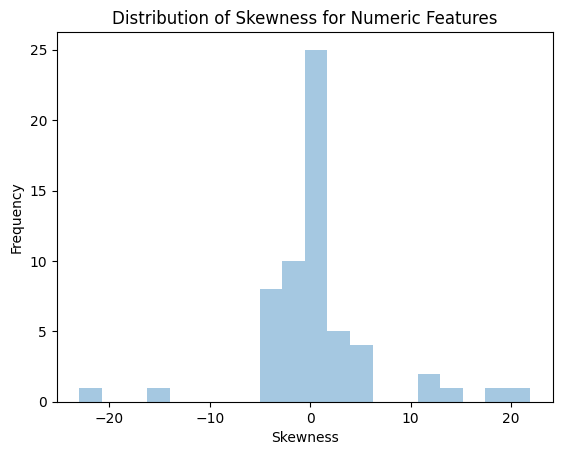

In [ ]:
def plot_features_skewness():
  numeric_feats = dataset.dtypes[dataset.dtypes != 'object'].index
  # Calculate skewness for each numeric feature
  def calc_skew(x):
      return skew(x.dropna())

  skewed_feats = dataset[numeric_feats].apply(calc_skew)
  sns.distplot(skewed_feats, bins=20, kde=False)
  plt.xlabel('Skewness')
  plt.ylabel('Frequency')
  plt.title('Distribution of Skewness for Numeric Features')
  plt.show()
  return pd.DataFrame({'Skew' :skewed_feats})

skewness = plot_features_skewness()

* **normal distribution** - skewness = 0
* **right-skewed** : skewness > 0 : more weight in the left tail of the distribution (right-skewed).
* **left-skewed** - skewness < 0 : more weight in the right tail of the distribution.

The features can be seen to be left skewed, thus a **Box-Cox Trannsformation** will be applied to shift the distributions towards the mean

The Box Cox transformation improves the accuracy of the regression models by making data easier to work with. "Stabilizing variance is essential because it ensures that the results of statistical tests are not influenced by variability in the data" [1] Futhermore, it allows the model to learn more detail from the model and avoid underfitting

* First the features with a skewness greater than 0.75 are selected. 0.75 is common threshold used to identify skewed features
* The value of lambda was chosen using trial and error to find the best transformation that reduces the skewness. lambda=0.15 was chosen
* Iterate over the skewed features and apply the Box-Cox transformation

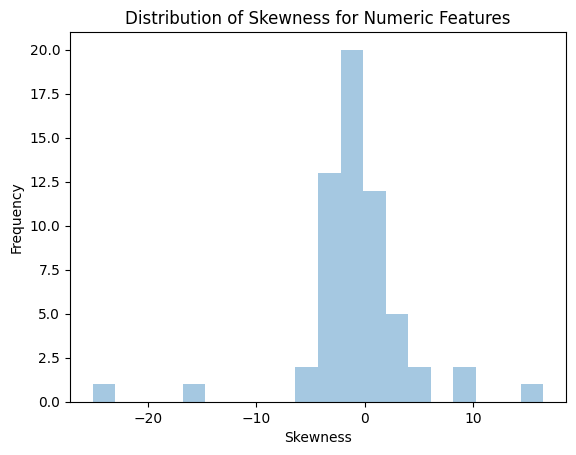

In [ ]:
skewness = skewness[abs(skewness) > 0.75]

skewed_features = skewness.index
lam = 0.15

for feat in skewed_features:
    # check for NaN values before the transformation
    if dataset[feat].isnull().any():
        dataset[feat] = dataset[feat].fillna(dataset[feat].median())

    # transform the feature using boxcox1p
    dataset[feat] = boxcox1p(dataset[feat], lam)

    # check for NaN values after the transformation
    if dataset[feat].isnull().any():
        dataset[feat] = dataset[feat].fillna(dataset[feat].median())

x = plot_features_skewness()

####One-hot encoding

The remaining categorical features which contain no hierachy between classes are encoding using one-hot encoding

In [ ]:
dataset = pd.get_dummies(dataset)

The dataset is then split back to the original shape of the train and test sets. A validation set is not defined, as K-fold cross-validation metric will be used which creates K validation sets which provides a more accurate estimate of the performance

In [ ]:
train = dataset[:train_size]
test = dataset[train_size:]
print(f'train shape : {train.shape}','\n' f'test shape{test.shape}')

train shape : (1456, 220) 
test shape(1459, 220)


**Data Preprocessing Summary**
* Feature specific data imputation
* Label-encoding of hierachial features
* One-hot encoding of categorical features
* Box-Cox transformation for skewed features

### K-Fold Cross Validation

* train_test_split is avoided as the random splitting can result in scoring metrics providing inaccurate results of the models performance due to a biased split. Futhermore, it can lead to overfittting, thus K-fold Cross Validation was used.

* K-fold Cross-Validation involves splitting the train set in K different folds (chunks). K-1 folds are used to train the model and the remaining fold is used to evaluate the models performance (it is a validation set). This is repeated K times with each of the K parts serving as the validation set atleast once.

* Cross-Validation allows for a more accurate estimation of the models performance since numerous validation sets are used instead of only one ast in train_test_split. Thus it can help avoid overfitting by using all the train data for training and evaluation which provides a more representative estimate of the model's performance on new, unseen data

* Cross-Validation is particularly useful when the dataset is small

In [ ]:
scoring = {
    'r2_score': make_scorer(r2_score),
    'MSE': make_scorer(mean_squared_error),
}

def val_score(model,folds=5):
  folds = KFold(n_splits =folds, shuffle = True, random_state = 42)
  scores = cross_validate(model, train, y, cv=folds, scoring=scoring,return_train_score=True)
  return scores

### Models

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor, LassoCV, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [ ]:
def plotMSEvsFolds(model):
  mse_scores = []
  r2_scores = []
  cv_range = range(2, 10)

  for cv in cv_range:
      scores = val_score(model,cv)
      mse_scores.append(np.sqrt(np.mean(scores['test_MSE'])))

  plt.plot(cv_range, mse_scores, label='MSE')
  plt.xlabel('Number of cross-validation folds')
  plt.ylabel('MSE Error')
  plt.title('MSE Error vs. Number of cross-validation folds')
  plt.show()

#### Linear Regression Model

In [ ]:
linear_reg = LinearRegression()

####Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(random_state = 42)

Hyperparameter tuning using RandomSearchCV

In [ ]:
param_grid = {
    'max_depth' : [6,7,10],
    'min_samples_split' : [ 5, 10],
    'min_samples_leaf' : [1, 4]
}

rf_search = RandomizedSearchCV(estimator = rf,
                               param_distributions = param_grid,
                               n_iter = 20,
                               cv = 5,
                               verbose=2,
                               random_state=42,
                               n_jobs = -1)

rf_search.fit(train, y)
print(rf_search.best_params_)
print(rf_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}
0.8824711026125363


Create model using best parameters from search

In [ ]:
rf = RandomForestRegressor(n_estimators=700,
                           min_samples_split=2,
                           min_samples_leaf= 1,
                         max_depth= 10
                           )


####KNN Regression

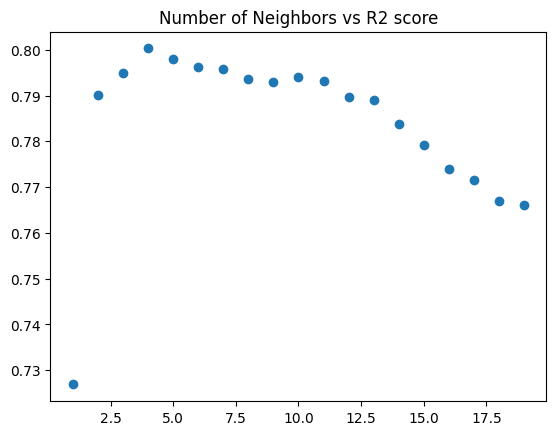

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
score=[]

for i in range(1,20):

  knn = KNeighborsRegressor(n_neighbors=i)
  score.append(np.sqrt(np.mean(cross_val_score(knn,train,y,cv=5))))

plt.title('Number of Neighbors vs R2 score')
plt.scatter(range(1,20),score);
plt.show();

Best performance for 4 neighbors

In [ ]:
knn = KNeighborsRegressor(n_neighbors=4)

#### Gradient Boosting Regression




The parameters for the GradientBoostingRegressor model have been chosen to achieve a good balance between model complexity and generalization.

**n_estimators**: The number of boosting stages to perform. A higher number of estimators can increase the performance of the model, but also increase the computational time. 3000 is a relatively high value.

**learning_rate**: The learning rate shrinks the contribution of each tree by the ***learning_rate*** value. A smaller learning rate will generally require more trees to be added to the model to achieve the same level of performance, but can make the model more robust to overfitting. A value of *0.05* is relatively small, but can help to prevent overfitting.

**max_depth**: The maximum depth of the individual decision trees. Increasing the depth of the trees can increase the model's capacity to fit the training data, but can also increase the risk of overfitting. A depth of *4* strikes a balance between model complexity and generalization.

**max_features**: The number of features to consider when looking for the best split. *sqrt* means that the square root of the number of features will be used. This value is a common heuristic that can help to prevent overfitting.

**min_samples_leaf and min_samples_split**: The minimum number of samples required to be at a leaf node and to make a split, respectively. These parameters can help to prevent overfitting by setting a threshold for the number of samples required for a split or leaf.

**loss**: The loss function to optimize. 'huber' is a robust loss function that is less sensitive to outliers than the mean squared error loss.

**random_state**: This parameter controls the random number generator used during the fitting process. Setting it to a fixed value (e.g. 5 in this case) ensures that the results are reproducible.

In [ ]:
GBoost = GradientBoostingRegressor(n_estimators = 3000, learning_rate = 0.05,
                                   max_depth = 4, max_features = 'sqrt',
                                   min_samples_leaf = 15, min_samples_split = 10, loss = 'huber', random_state = 5)

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint as sp_randint

# # define the hyperparameters to search over
# params = {
#     'n_estimators': sp_randint(1000, 5000),
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': sp_randint(2, 10),
#     'max_features': ['sqrt', 'log2'],
#     'min_samples_leaf': sp_randint(5, 20),
#     'min_samples_split': sp_randint(5, 20),
#     'loss': ['ls', 'lad', 'huber', 'quantile'],
#     'random_state': [5]
# }

# # create a GradientBoostingRegressor with the initial hyperparameters
# gb = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4,
#                                max_features='sqrt', min_samples_leaf=15,
#                                min_samples_split=10, loss='huber', random_state=5)

# # define the randomized search object
# random_search = RandomizedSearchCV(estimator=gb, param_distributions=params, n_iter=50,
#                                    n_jobs=-1, cv=5, random_state=42)

# # fit the model and find the optimal hyperparameters
# random_search.fit(train, y)

# # print the best hyperparameters and the corresponding score
# print(random_search.best_params_)
# print(random_search.best_score_)


#### Kernel Ridge

**alpha = 0.6:** This parameter controls the regularization strength. A smaller value of alpha would result in a less regularized model and a larger value would result in a more regularized model.

**kernel = 'polynomial':** This parameter specifies the type of kernel to be used. A polynomial kernel is useful when the data is nonlinearly separable.

**degree = 2:** It specifies the degree of the polynomial. A larger degree allows the model to fit more complex functions, but also increases the risk of overfitting.

**coef0 = 2.5:** This parameter controls the influence of high-degree polynomials versus low-degree polynomials. A larger value of coef0 would give more weight to higher-degree polynomials.

In [ ]:
KRR = KernelRidge(alpha = 0.6, kernel = 'polynomial', degree = 2, coef0 = 2.5)

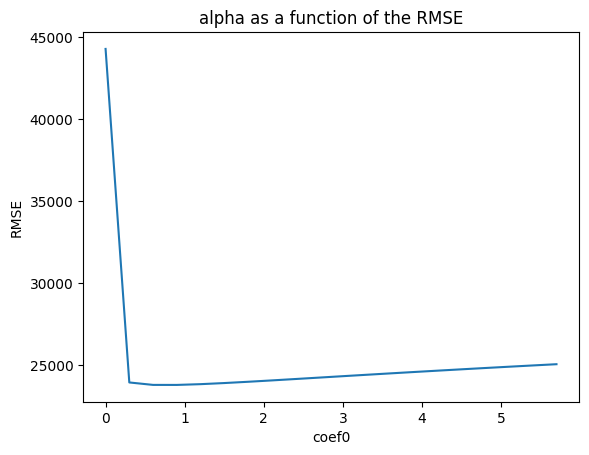

In [ ]:
num = np.arange(0,6, 0.3)

coefs = []
for a in num:
    ridge = KernelRidge(coef0=2, alpha = a, kernel = 'polynomial', degree = 2)
    score = val_score(ridge,7)
    x=np.sqrt(pd.DataFrame(val_score(ridge,7)).mean()['test_MSE'])
    coefs.append(x)

plt.plot(num, coefs)
plt.xlabel('coef0')
plt.ylabel('RMSE')
plt.title('alpha as a function of the RMSE')
plt.show()

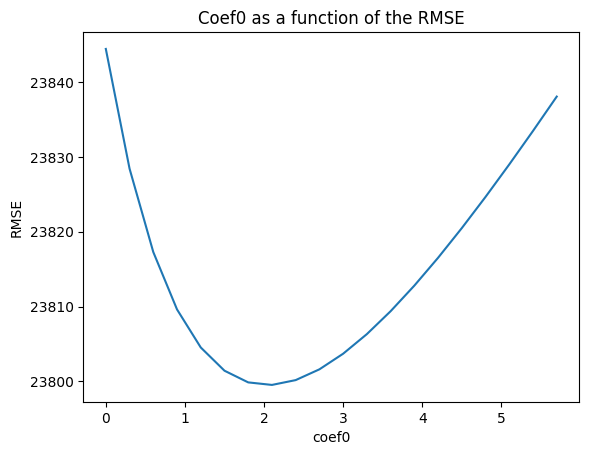

In [ ]:
num = np.arange(0,6, 0.3)

coefs = []
for a in num:
    ridge = KernelRidge(coef0=a, alpha = 0.6, kernel = 'polynomial', degree = 2)
    score = val_score(ridge,7)
    x=np.sqrt(pd.DataFrame(val_score(ridge,7)).mean()['test_MSE'])
    coefs.append(x)

plt.plot(num, coefs)
plt.xlabel('coef0')
plt.ylabel('RMSE')
plt.title('Coef0 as a function of the RMSE')
plt.show()

#### Averaging Models

This code defines a class called AveragingModels which is used for ensemble learning. The class inherits from three other classes: BaseEstimator, RegressorMixin, and TransformerMixin.

The constructor method (__init__) takes a list of models as input, which are the machine learning models that will be used for ensemble learning.

The fit method takes training data (X and y) and trains each model in the models list using the training data. The method creates a new list self.models_ that contains the cloned instances of each model from the original models list. This is done to ensure that each model in the ensemble is independent of each other. Then, the fit method calls the fit method of each model in self.models_ to train them on the training data.

The predict method takes test data X and makes predictions using each model in self.models_. The predictions for each model are then stacked into a 2D array, and the mean of each row (i.e. the average prediction of all models) is returned as the final prediction.

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.base import clone
import numpy as np

class EnsembleRegressor(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]

        for model in self.models_:
            model.fit(X, y)

        return self

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.models_)))

        for i, model in enumerate(self.models_):
            predictions[:, i] = model.predict(X)

        return np.mean(predictions, axis=1)


In [ ]:
combined_Models = EnsembleRegressor(models = (KRR, GBoost))

### Cross validation

#### Linear regression

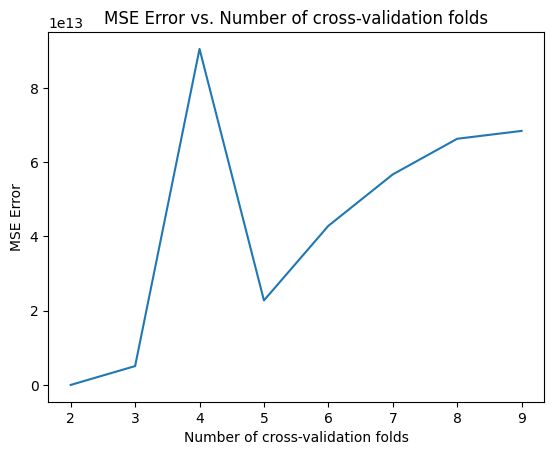

In [ ]:
plotMSEvsFolds(linear_reg)

#### Kernel Ridge Regression

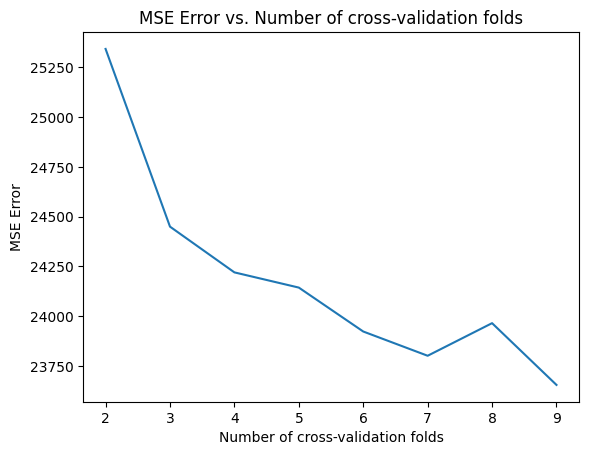

In [ ]:
plotMSEvsFolds(KRR)

#### Gradient Boost Regression

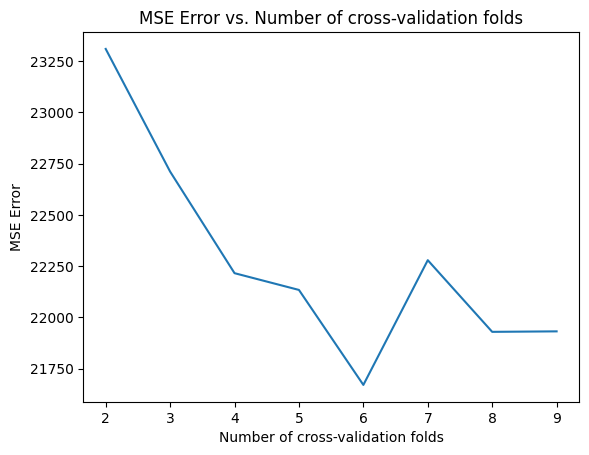

In [ ]:
plotMSEvsFolds(GBoost)

#### Combined Models

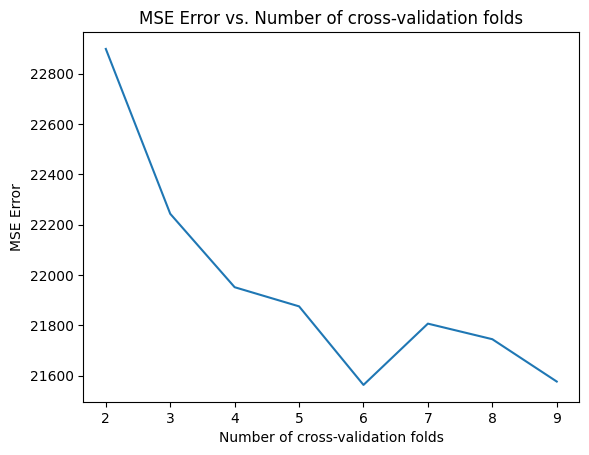

In [ ]:
plotMSEvsFolds(combined_Models)

### Cross Validation Scores

In [ ]:
scores_linear = val_score(linear_reg,2)
scores_knn = val_score(knn)
scores_rf = val_score(rf)
scores_ridge = val_score(KRR,10)
scores_GBR = val_score(GBoost,6)
scores_combined = val_score(combined_Models,6)

In [ ]:
model_scores = [scores_linear, scores_knn, scores_rf, scores_GBR,scores_ridge,scores_combined]

df = pd.DataFrame([
    (model['train_r2_score'].mean() for model in model_scores),
    (model['test_r2_score'].mean() for model in model_scores),
    (model['train_MSE'].mean() for model in model_scores),
    (np.sqrt(model['train_MSE'].mean()) for model in model_scores),
    (model['test_MSE'].mean() for model in model_scores),
    (np.sqrt(model['test_MSE'].mean()) for model in model_scores),

],columns=('Linear', 'KNN ', 'RF','Gboost','KRR','Ensemble') )

df.insert(0, 'Metrics',['Train R2', 'Test R2', 'Train MSE','Train RMSE', 'Test MSE','Test_RMSE'] )
df.head(10)

,Metrics,Linear,KNN,RF,Gboost,KRR,Ensemble
0,Train R2,9.291183e-01,8.024515e-01,9.800186e-01,9.891389e-01,9.475159e-01,9.768414e-01
1,Test R2,8.462751e-01,6.548121e-01,8.867973e-01,9.197802e-01,9.013921e-01,9.205064e-01
2,Train MSE,4.186132e+08,1.161244e+09,1.174694e+08,6.382571e+07,3.084547e+08,1.360806e+08
3,Train RMSE,2.046004e+04,3.407703e+04,1.083833e+04,7.989099e+03,1.756288e+04,1.166536e+04
4,Test MSE,9.036077e+08,2.023005e+09,6.672559e+08,4.695918e+08,5.664941e+08,4.649840e+08
5,Test_RMSE,3.006007e+04,4.497783e+04,2.583130e+04,2.167007e+04,2.380114e+04,2.156349e+04


### Training and Predicting Models

#### Averaged Models

In [ ]:
combined_Models.fit(train, y)
stacked_train_pred = combined_Models .predict(train)
stacked_pred = (combined_Models .predict(test))

#### Gradient Boost Regression

In [ ]:
GBoost.fit(train, y)
GBoost_train_pred = GBoost.predict(train)
GBoost_pred = (GBoost.predict(test))

<Axes: xlabel='feature_importance', ylabel='index'>

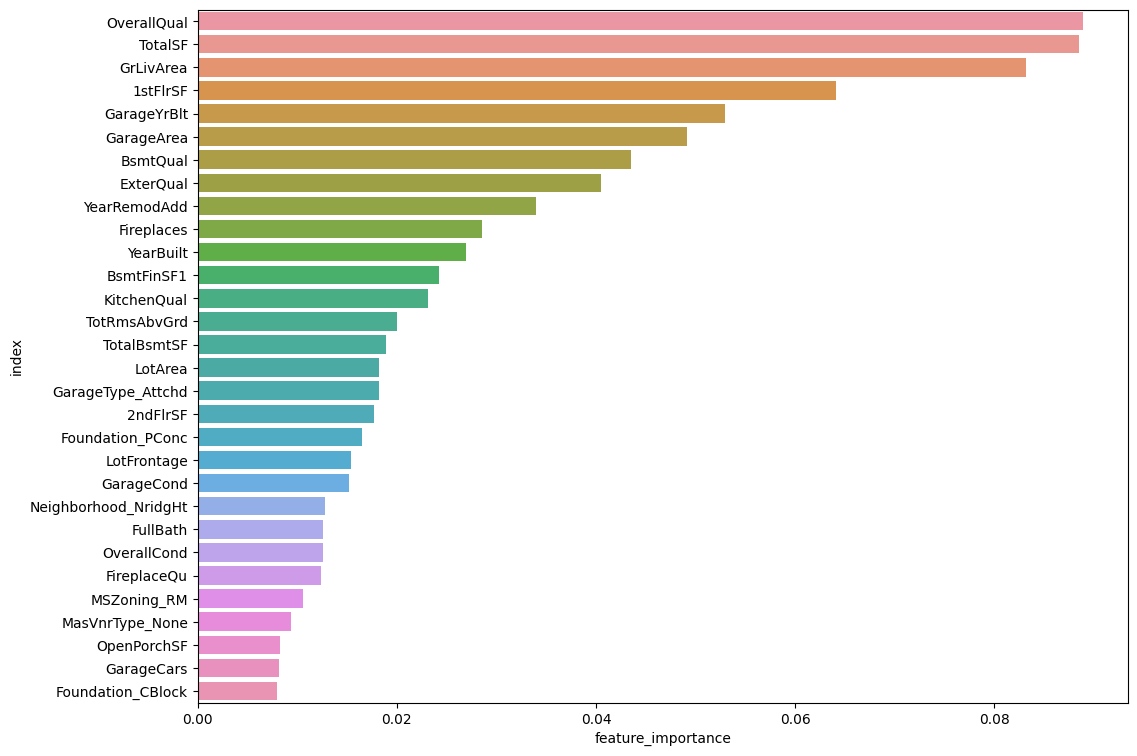

In [ ]:
varImp = pd.DataFrame({'index':train.columns, 'feature_importance':GBoost.feature_importances_})
varImp.sort_values(by='feature_importance', ascending=False, inplace=True)
f, ax = plt.subplots(1, 1, figsize=[12, 9])
sns.barplot(x = 'feature_importance', y = 'index', data = varImp.iloc[:30,], ax = ax)

This line of code combines the predictions made by two different models, **stacked_pred** and **GBoost_pred**, using a weighted average. The **stacked_pred** is given a weight of *0.6* and the **GBoost_pred** is given a weight of *0.4*. This means that the final prediction is a linear combination of the two predictions, where the **stacked_pred** prediction contributes *60%* to the final prediction and the **GBoost_pred** prediction contributes *40%*.

In [ ]:
ensemble_models_pred = stacked_pred*0.6 + GBoost_pred*0.4

###Summary
Different models were trained and it was determined that the ensemble/averaging model performed best compared to the tuned base models. The esemble model has the best r2 score ad the lowest MSE

### SUBMISSION

In [ ]:
submission = pd.DataFrame()
submission['Id'] = testID
submission['SalePrice'] = ensemble_models_pred
submission.to_csv('submission.csv', index = False)

### Leaderboard


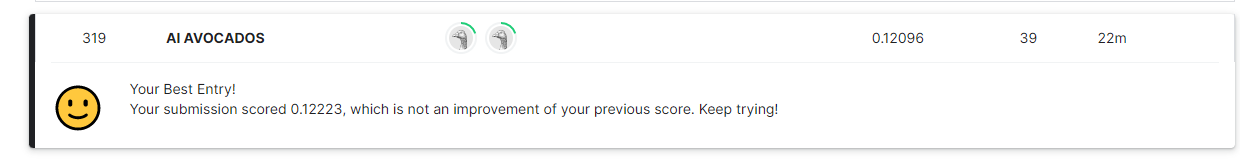

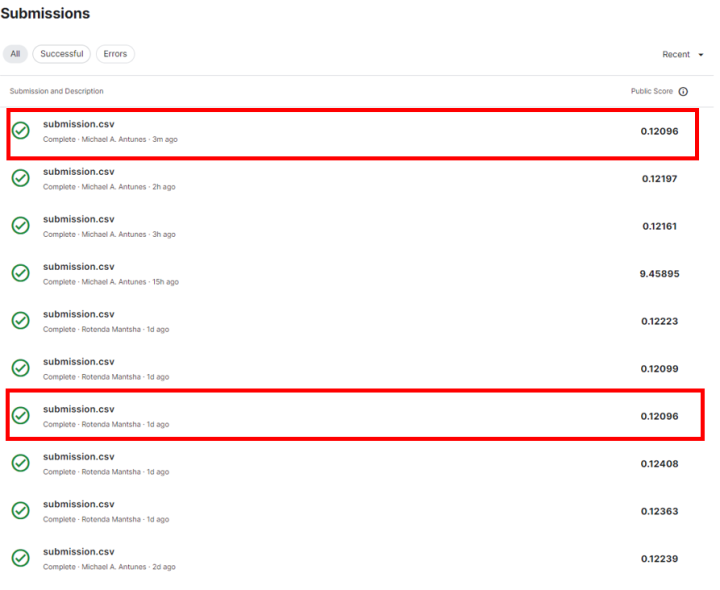

### References

[1] https://leanscape.io/the-box-cox-transformation-what-it-is-and-how-to-use-it/


https://towardsdatascience.com/exploratory-data-analysis-unravelling-a-story-with-data-b01d70069035


https://towardsdatascience.com/machine-learning-predicting-house-prices-with-regression-2388bb876a6f

https://www.kaggle.com/code/lukabrown/gradient-boosting
https://datagy.io/pandas-get-dummies/

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html

In [ ]:
!pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
